# Interacting species

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint

## Helping functions

In [2]:
def plot_phase_portrait(
    dx_dt, ts, 
    xlim=np.array([-3, 3]), 
    ylim=np.array([-3, 3]), 
    title=None,
    ic_x = np.linspace(*[-3, 3], 9),
    ic_y = np.linspace(*[-3, 3], 9),
    linewidth=1):

    plt.figure(figsize=(6, 6))
    for r in ic_x:
        for s in ic_y:
            x0 = [r, s]
            xs = odeint(dx_dt, x0, ts)
            plt.plot(xs[:, 0], xs[:, 1], 'r-', linewidth=linewidth)

    X, Y = np.mgrid[xlim[0]:xlim[1]:15j, ylim[0]:ylim[1]:15j]
    u = a*X + b*Y
    v = c*X + d*Y
    plt.quiver(X, Y, u, v, color='b')

    plt.title(title)
    plt.xlim(np.array(xlim) * 1.1)
    plt.ylim(np.array(ylim) * 1.1)

plt.show()

In [134]:
def plot_traj(x0, dx_dt, fw=1, bw=1, n_time_samples=100):
    xs = odeint(dx_dt, x0, np.linspace(0, fw, n_time_samples))
    plt.plot(xs[:, 0], xs[:, 1], 'r-', linewidth=1)
    
    xs = odeint(dx_dt, x0, np.linspace(0, bw, n_time_samples))
    plt.plot(xs[:, 0], xs[:, 1], 'r-', linewidth=1)

In [4]:
def plot_field(dx_dt, xlim, scale=100):
    X, Y = np.mgrid[xlim[0]:xlim[1]:15j, ylim[0]:ylim[1]:15j]
    u, v = dx_dt([X, Y], None)
    plt.quiver(X, Y, u, v, color='b', scale=scale)

## Competing species

### Coexisting

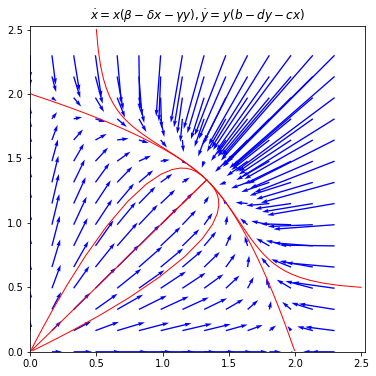

In [5]:
N = 2.3
xlim = (0, N)
ylim = (0, N)

beta, delta, gamma,  = 2, 1, 0.5
b, d, c = 2, 1, 0.5

def dx_dt(x, t):
    return [x[0]*(beta - delta*x[0] - gamma*x[1]), x[1]*(b - d*x[1] - c*x[0])]

plt.figure(figsize=(6, 6))
plt.title('$\\dot{x} = x(\\beta - \\delta x - \\gamma y), \\dot{y} = y(b - dy - cx)$')

plot_traj([1, 1], dx_dt, fw=10, bw=0)
plot_traj([0.01, 0.01], dx_dt, fw=0, bw=200)
plot_traj([0.02, 0.01], dx_dt, fw=0, bw=30)
plot_traj([0.01, 0.02], dx_dt, fw=0, bw=30)
plot_traj([0.01, 2], dx_dt, fw=10, bw=0)
plot_traj([2, 0.01], dx_dt, fw=10, bw=0)
plot_traj([0.5, 2.5], dx_dt, fw=10, bw=0)
plot_traj([2.5, 0.5], dx_dt, fw=10, bw=0)

plot_field(dx_dt, xlim, scale=10)

plt.xlim(np.array(xlim) * 1.1)
plt.ylim(np.array(ylim) * 1.1)

plt.show()

### One exticts depending on the initial conditions

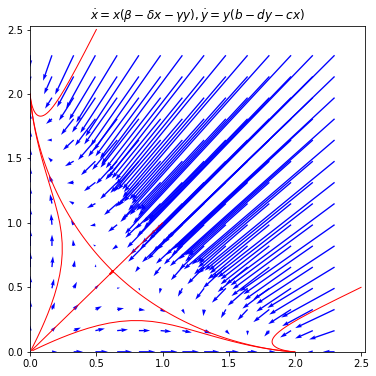

In [6]:
N = 2.3
xlim = (0, N)
ylim = (0, N)

beta, delta, gamma,  = 1, 0.5, 1.1
b, d, c = 1, 0.5, 1.1

def dx_dt(x, t):
    return [x[0]*(beta - delta*x[0] - gamma*x[1]), x[1]*(b - d*x[1] - c*x[0])]

plt.figure(figsize=(6, 6))
plt.title('$\\dot{x} = x(\\beta - \\delta x - \\gamma y), \\dot{y} = y(b - dy - cx)$')

plot_traj([1, 1], dx_dt, fw=10, bw=0)
plot_traj([0.01, 0.01], dx_dt, fw=0, bw=200)
plot_traj([0.02, 0.01], dx_dt, fw=0, bw=30)
plot_traj([0.01, 0.02], dx_dt, fw=0, bw=30)
plot_traj([0.5, 2.5], dx_dt, fw=10, bw=0)
plot_traj([2.5, 0.5], dx_dt, fw=10, bw=0)
plot_traj([0.605, 0.6], dx_dt, fw=0, bw=20)
plot_traj([0.6, 0.605], dx_dt, fw=0, bw=20)

plot_field(dx_dt, xlim, scale=10)

plt.xlim(np.array(xlim) * 1.1)
plt.ylim(np.array(ylim) * 1.1)

plt.show()

### One extincts in any case

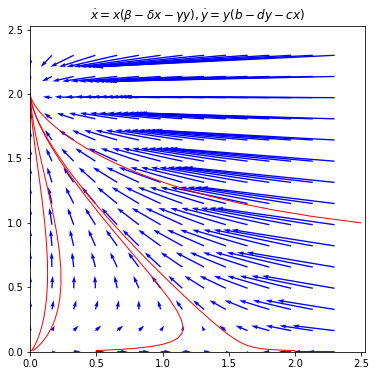

In [7]:
N = 2.3
xlim = (0, N)
ylim = (0, N)

beta, delta, gamma,  = 0.8, 0.5, 1.2
b, d, c = 1, 0.5, 0

def dx_dt(x, t):
    return [x[0]*(beta - delta*x[0] - gamma*x[1]), x[1]*(b - d*x[1] - c*x[0])]

plt.figure(figsize=(6, 6))
plt.title('$\\dot{x} = x(\\beta - \\delta x - \\gamma y), \\dot{y} = y(b - dy - cx)$')

plot_traj([0.01, 0.01], dx_dt, fw=0, bw=20)
plot_traj([0.02, 0.01], dx_dt, fw=0, bw=30)
plot_traj([0.5, 0.01], dx_dt, fw=0, bw=30)
plot_traj([2, 0.01], dx_dt, fw=10, bw=0)
plot_traj([2.5, 1], dx_dt, fw=10, bw=0)

plot_field(dx_dt, xlim, scale=10)

plt.xlim(np.array(xlim) * 1.1)
plt.ylim(np.array(ylim) * 1.1)

plt.show()

## Predatator prey model

### Lotka-Volterra model

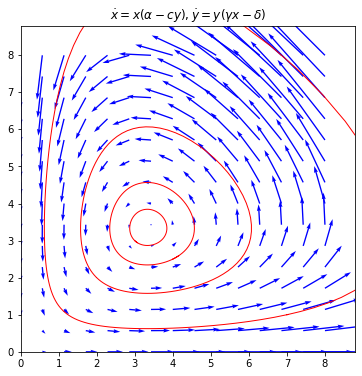

In [126]:
N = 8
xlim = (0, N)
ylim = (0, N)

alpha, c = 1, 0.3
gamma, delta  = 0.3, 1

def dx_dt(x, t):
    return [x[0]*(alpha - c*x[1]), x[1]*(gamma*x[0] - delta)]

plt.figure(figsize=(6, 6))
plt.title('$\\dot{x} = x(\\alpha - cy), \\dot{y} = y(\\gamma x - \\delta)$')

plot_traj([7, 1], dx_dt, fw=0, bw=7.22)
plot_traj([2, 2], dx_dt, fw=0, bw=6.5)
plot_traj([4, 2.5], dx_dt, fw=0, bw=6.5)
plot_traj([3, 3], dx_dt, fw=0, bw=6.5)

plot_field(dx_dt, xlim, scale=50)

plt.xlim(np.array(xlim) * 1.1)
plt.ylim(np.array(ylim) * 1.1)

plt.show()

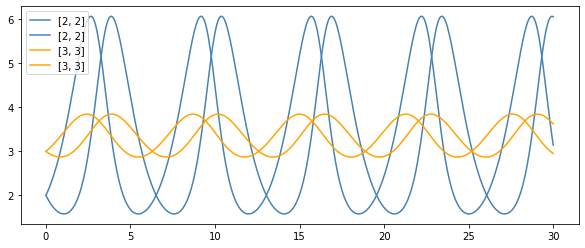

In [128]:
t = np.linspace(0, 30, 500)

plt.figure(figsize=(10, 4))
plt.plot(t, odeint(dx_dt, [2, 2], t), label='[2, 2]', color='steelblue')
plt.plot(t, odeint(dx_dt, [3, 3], t), label='[3, 3]', color='orange')
plt.legend()

plt.show()

### Holling-Tanner model

/home/mariosk/.pyenv/versions/3.7.4/envs/dynamic-systems/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in true_divide
  
/home/mariosk/.pyenv/versions/3.7.4/envs/dynamic-systems/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  


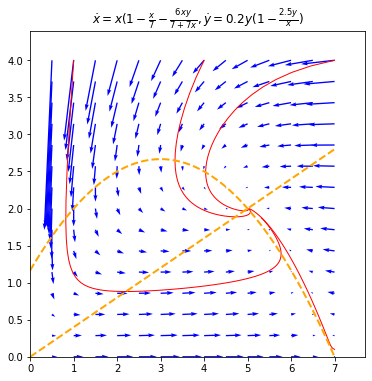

In [129]:
xlim = (0, 7)
ylim = (0, 4)

def dx_dt(N):
    def result(x, t): 
        return [x[0]*(1 - x[0] / 7) - 6*x[0]*x[1]/(7 + 7*x[0]), 0.2*x[1]*(1 - N*x[1]/x[0])]
    
    return result

plt.figure(figsize=(6, 6))
plt.title('$\\dot{x} = x(1 - \\frac{x}{7} - \\frac{6xy}{7 + 7x}, \\dot{y} = 0.2y(1 - \\frac{2.5y}{x})$')

plot_traj([7, 0.1], dx_dt(2.5), fw=30, bw=0)
plot_traj([1, 4], dx_dt(2.5), fw=15, bw=0)
plot_traj([4, 4], dx_dt(2.5), fw=20, bw=0)
plot_traj([7, 4], dx_dt(2.5), fw=20, bw=0)

plot_field(dx_dt(2.5), xlim, scale=30)

x = np.linspace(0, 7, 100)
y1 = 1/2.5*x
y2 = (- x**2 + 6*x + 7) / 6

plt.plot(x, y1, linestyle='--', color='orange', linewidth=2)
plt.plot(x, y2, linestyle='--', color='orange', linewidth=2)

plt.xlim(np.array(xlim) * 1.1)
plt.ylim(np.array(ylim) * 1.1)

plt.show()

/home/mariosk/.pyenv/versions/3.7.4/envs/dynamic-systems/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in true_divide
  
/home/mariosk/.pyenv/versions/3.7.4/envs/dynamic-systems/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  


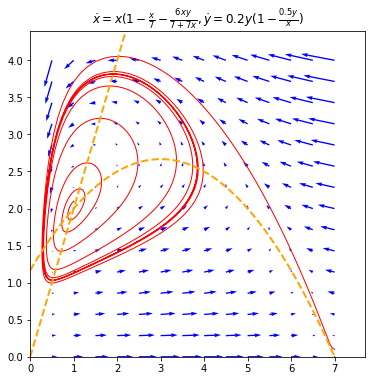

In [156]:
plt.figure(figsize=(6, 6))
plt.title('$\\dot{x} = x(1 - \\frac{x}{7} - \\frac{6xy}{7 + 7x}, \\dot{y} = 0.2y(1 - \\frac{0.5y}{x})$')

plot_traj([7, 0.1], dx_dt(0.5), fw=100, bw=0, n_time_samples=500)
plot_traj([1, 2.1], dx_dt(0.5), fw=100, bw=0, n_time_samples=500)

plot_field(dx_dt(0.5), xlim, scale=30)

x = np.linspace(0, 7, 100)
y1 = 1/0.5*x
y2 = (- x**2 + 6*x + 7) / 6

plt.plot(x, y1, linestyle='--', color='orange', linewidth=2)
plt.plot(x, y2, linestyle='--', color='orange', linewidth=2)

plt.xlim(np.array(xlim) * 1.1)
plt.ylim(np.array(ylim) * 1.1)

plt.show()

## Preditor-prey in the presence of infection

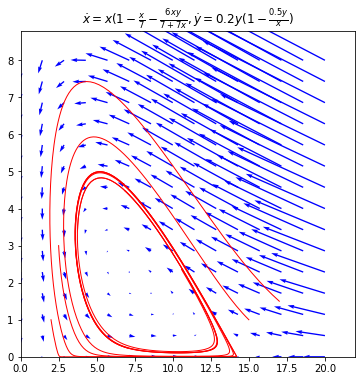

In [180]:
xlim = (0, 20)
ylim = (0, 8)

def dx_dt(x, t):
    b, c, theta, alpha, beta, d, P, gamma, h_s = 0.4, 1/20., 5, 0.05, 0.05, 0.05, 1, 1, 1

    f_s = P*x[0] / (h_s + x[0] + theta*gamma*x[1])
    f_i = P*theta*x[1] / (h_s + x[0] + theta*gamma*x[1])        
    return [
        b*x[0]*(1 - c*(x[0] + x[1])) - d*x[0] - beta*x[0]*x[1] - f_s,
        beta*x[0]*x[1] - (d + alpha)*x[1] - f_i]

plt.figure(figsize=(6, 6))
plt.title('$\\dot{x} = x(1 - \\frac{x}{7} - \\frac{6xy}{7 + 7x}, \\dot{y} = 0.2y(1 - \\frac{0.5y}{x})$')

plot_traj([2, 1], dx_dt, fw=200, bw=0, n_time_samples=500)
plot_traj([2.5, 3], dx_dt, fw=100, bw=0, n_time_samples=500)
plot_traj([17, 1.5], dx_dt, fw=100, bw=0, n_time_samples=500)
plot_traj([15, 1], dx_dt, fw=100, bw=0, n_time_samples=500)

plot_field(dx_dt, xlim, scale=30)

plt.xlim(np.array(xlim) * 1.1)
plt.ylim(np.array(ylim) * 1.1)

plt.show()